In [1]:
# 分数（5）
import json


def read_corpus():
    """
    读取给定的语料库，并把问题列表和答案列表分别写入到 qlist, alist 里面。 在此过程中，不用对字符换做任何的处理（这部分需要在 Part 2.3里处理）
    qlist = ["问题1"， “问题2”， “问题3” ....]
    alist = ["答案1", "答案2", "答案3" ....]
    务必要让每一个问题和答案对应起来（下标位置一致）
    """
    qjson = 'data/train-v3.0.json'
    with open(qjson, 'r', encoding='utf-8') as rf:
        qdict = json.loads(rf.read())
    qlist, alist = [], []
    for data in qdict['data']:
        # print(data['title'])
        for paragraph in data['paragraphs']:
            for qa in paragraph['qas']:
                # print(len(qa['answers']), qa)
                if len(qa['answers'])==1:
                    qlist.append(qa['question'])
                    alist.append(qa['answers'][0]['text'])
                # else:
                #     alist.append('')
            # print(paragraph['context'])
    assert len(qlist) == len(alist)  # 确保长度一样
    return qlist, alist

In [2]:
qlist, alist = read_corpus()
print(len(qlist))

86821


In [3]:
# 分数（10）
# TODO: 统计一下在qlist 总共出现了多少个单词？ 总共出现了多少个不同的单词？
#       这里需要做简单的分词，对于英文我们根据空格来分词即可，其他过滤暂不考虑（只需分词）
q_total = [word for each_q in qlist for word in each_q.split(' ') ]
q_total_set = set(q_total)
print(len(q_total), len(q_total_set))
print(q_total[:100])

903411 63780
['When', 'did', 'Beyonce', 'start', 'becoming', 'popular?', 'What', 'areas', 'did', 'Beyonce', 'compete', 'in', 'when', 'she', 'was', 'growing', 'up?', 'When', 'did', 'Beyonce', 'leave', "Destiny's", 'Child', 'and', 'become', 'a', 'solo', 'singer?', 'In', 'what', 'city', 'and', 'state', 'did', 'Beyonce', '', 'grow', 'up?', '', 'In', 'which', 'decade', 'did', 'Beyonce', 'become', 'famous?', 'In', 'what', 'R&B', 'group', 'was', 'she', 'the', 'lead', 'singer?', 'What', 'album', 'made', 'her', 'a', 'worldwide', 'known', 'artist?', 'Who', 'managed', 'the', "Destiny's", 'Child', 'group?', 'When', 'did', 'Beyoncé', 'rise', 'to', 'fame?', 'What', 'role', 'did', 'Beyoncé', 'have', 'in', "Destiny's", 'Child?', 'What', 'was', 'the', 'first', 'album', 'Beyoncé', 'released', 'as', 'a', 'solo', 'artist?', 'When', 'did', 'Beyoncé', 'release', 'Dangerously', 'in']


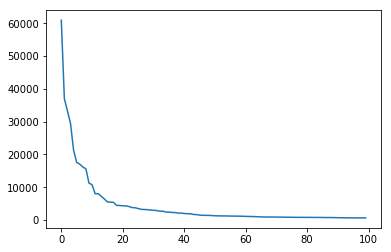

In [4]:
# TODO: 统计一下qlist中每个单词出现的频率，并把这些频率排一下序，然后画成plot. 比如总共出现了总共7个不同单词，而且每个单词出现的频率为 4, 5,10,2, 1, 1,1
#       把频率排序之后就可以得到(从大到小) 10, 5, 4, 2, 1, 1, 1. 然后把这7个数plot即可（从大到小）
#       需要使用matplotlib里的plot函数。y轴是词频
%matplotlib inline

import collections
import matplotlib.pyplot as plt

qs_counter = collections.Counter(q_total)
qs, qs_c = zip(*qs_counter.most_common())
plt.plot(range(100), qs_c[:100]);
# plt.plot(range(len(qs_c)), qs_c);

In [5]:
# TODO： 从上面的图中能观察到什么样的现象？ 这样的一个图的形状跟一个非常著名的函数形状很类似，能所出此定理吗？ 
#       hint: [XXX]'s law
# 指数函数
# 

In [6]:
# TODO: 在qlist和alist里出现次数最多的TOP 10单词分别是什么？ 
a_total = [word for each_a in alist for word in each_a.split(' ') ]
a_total_set = set(a_total)
as_counter = collections.Counter(a_total)
print("qlist出现次数最多的TOP 10单词及词频:\n", qs_counter.most_common(10))
print("alist出现次数最多的TOP 10单词及词频:\n", as_counter.most_common(10))

qlist出现次数最多的TOP 10单词及词频:
 [('the', 60959), ('What', 36994), ('of', 33300), ('', 29438), ('in', 21267), ('to', 17579), ('was', 17041), ('is', 16165), ('did', 15624), ('what', 11255)]
alist出现次数最多的TOP 10单词及词频:
 [('the', 13211), ('of', 8892), ('and', 8172), ('to', 3440), ('a', 3294), ('in', 2838), ('The', 1769), ('or', 1261), ('for', 1032), ('million', 853)]


### 2.3 文本预处理
次部分需要尝试做文本的处理。在这里我们面对的是英文文本，所以任何对英文适合的技术都可以考虑进来。

In [7]:
import json


class DictTree(object):
    def __init__(self, name='root', word=None, info=None):
        self.name = name
        self.info = info
        self.word = word
        self.children = {}
    
    def __str__(self):
        return json.dumps({self.word: self.info}, ensure_ascii=False)
    
    def set_info(self, info):
        self.info = info
    
    def find_child(self, name):
        """查询子节点是否存在"""
        if name in self.children.keys():
            return True
        else:
            return False
    
    def add_word(self, chars, info, pointer=0):
        """将数据创建成字典树"""
        if len(chars[pointer:]) <= 0:
            self.info = info
            self.word = chars
        else:
            if not self.find_child(chars[pointer]):
                self.children[chars[pointer]] = DictTree(chars[pointer])
            self.children[chars[pointer]].add_word(chars, info, pointer + 1)
    
    def add_words(self, words, infos):
        """添加多组词"""
        for word, info in zip(words, infos):
            self.add_word(word, info)
            
    def add_words2(self, words):
        """添加多组词，不添加此相关信息"""
        for word in words:
            self.add_word(word, None)
    
    def cut_word(self, chars):
        """
        查询字典树中是否有某个词
        return: 没有该词会返回空，有该值会返回该词的信息
        """
        if len(chars) == 0:
            if self.word is None:
                return None
            else:
                return self
        elif self.find_child(chars[0]):
            return self.children[chars[0]].cut_word(chars[1:])
        else:
            return None
    
    def _cut_words(self, chars):
        """
        查询字典树中是否有某个词
        return: 没有该词会返回空，有该值会返回该词的信息
        """
        words = set()
        if len(chars) == 0:
            return words
        if self.word is not None:
            words.add(self)
        if self.find_child(chars[0]):
            words.update(self.children[chars[0]]._cut_words(chars[1:]))
        return words
        
    def cut_words(self, sentence):
        """查询字典树"""
        words = set()
        if len(sentence) == 0:
            return words
        for n in range(len(sentence)):
            words.update(self._cut_words(sentence[n:]))
        return words
    
    def to_dict(self):
        """输出成dict"""
        children = {}
        for child_name, child_node in self.children.items():
            children[child_name] = child_node.to_dict()
        return {
            'name': self.name,
            'info': self.info,
            'children': children,
        }
    
    def read_dict(self, node_dict):
        """从dict中读入"""
        self.name = node_dict['name']
        self.info = node_dict['info']
        for child_name, child_dict in node_dict['children'].items():
            self.children[child_name] = Node(None).read_dict(child_dict)


In [8]:
with open('data/英文停用词.txt', 'r', encoding='utf-8') as f:
    words = set(f.read().split('\n') + [''])
stop_words = DictTree()
stop_words.add_words2(words)

In [9]:
import re
import nltk
from nltk.stem.porter import PorterStemmer

porter_stemmer = PorterStemmer()

def cut(sentence):
    """英文分词"""
    words = []
    for word in re.split(r'\s+', sentence):
        find_punc = re.search('^(.+)([,.?!:;]+)$', word)
        if find_punc is not None:
            words.append(find_punc.groups()[0])
            words.append(find_punc.groups()[1])
        else:
            words.append(word)
    return words

def lower_case(words):
    """全部转为小写字母"""
    return [i.lower() for i in words]

def del_stop_words(words):
    """去除停用词"""
    # 不在停用词表的词
    return [i for i in words if stop_words.cut_word(i) is None]

def porter_stemming(words):
    return [porter_stemmer.stem(w) for w in words]

def number2word(words):
    return ['#number' if re.search(r'\d+\.*\d*', word) else word for word in words]

def get_counter(all_words):
    """获取词频"""
    return collections.Counter([word for words in all_words for word in words])

def del_low_freq_words(all_words, w_counter, low_freq=1):
    """删除低频词
    param: all_words: [[words], ...]
    param: low_freq: 删除低于该频率的词
    """
    low_freq_words = [i[0] for i in w_counter.most_common() if i[1] <= low_freq]
    lfw_tree = DictTree()
    lfw_tree.add_words2(low_freq_words)
    print(len(low_freq_words), len(w_counter.most_common()))
    return [[word for word in words if lfw_tree.cut_word(word) is None] for words in all_words]

In [10]:
# test
print(cut('I am bjm. '))
print(del_stop_words(cut('I am bjm. ')))
test_all_words = [['1','1','2','3','3'],['1','3','4','4','5','5', '8']]
print(del_low_freq_words(test_all_words, get_counter(test_all_words)))

['I', 'am', 'bjm', '.', '']
['I', 'bjm', '.']
2 6
[['1', '1', '3', '3'], ['1', '3', '4', '4', '5', '5']]


In [20]:
def sentence2words(sentence):
    """单个句子的预处理，处理为词"""
    words = cut(sentence)
    dsw_words = del_stop_words(words)
    # ps_words = porter_stemming(dsw_words)
    lc_words = lower_case(dsw_words)
    dsw_words = del_stop_words(lc_words)
    n2w_words = number2word(dsw_words)
    return n2w_words

def preprocess(sentences):
    """数据处理"""
    all_words = []
    for sentence in sentences:
        words = sentence2words(sentence)
        all_words.append(words)
    w_counter = get_counter(all_words)
    all_words = del_low_freq_words(all_words, w_counter, low_freq=10)
    return all_words
all_q_words = preprocess(qlist)
all_a_words = preprocess(alist)

34927 40382
37235 40093


In [21]:
# 打印前十个问题，及其分词
for i, j in zip(qlist, all_q_words[:10]):
    print('%s\n%s' % (i, j))

When did Beyonce start becoming popular?
['beyonce', 'start', 'popular', '?']
What areas did Beyonce compete in when she was growing up?
['beyonce', 'compete', 'growing', '?']
When did Beyonce leave Destiny's Child and become a solo singer?
['beyonce', 'leave', "destiny's", 'child', 'solo', 'singer', '?']
In what city and state did Beyonce  grow up? 
['city', 'beyonce', 'grow', '?']
In which decade did Beyonce become famous?
['decade', 'beyonce', 'famous', '?']
In what R&B group was she the lead singer?
['r&b', 'lead', 'singer', '?']
What album made her a worldwide known artist?
['album', 'worldwide', 'artist', '?']
Who managed the Destiny's Child group?
['managed', "destiny's", 'child', '?']
When did Beyoncé rise to fame?
['beyoncé', 'rise', 'fame', '?']
What role did Beyoncé have in Destiny's Child?
['role', 'beyoncé', "destiny's", 'child', '?']


In [13]:
# 若返回空则证明数字已被处理为#number
i = 0
for q_words in all_q_words:
    for word in q_words:
        if re.search(r'^\d+$', word) is not None:
            i += 1
            if i >= 10:
                break
            print(word, q_words)

In [14]:
# TODO: 在前面步骤里，我们删除了出现次数比较少的单词，那你选择的阈值是多少（小于多少的去掉？）， 这个阈值是根据什么来选择的？ 
#  


### 2.4 文本表示
当我们做完关键的预处理过程之后，就需要把每一个文本转换成向量。

In [37]:
# 分数（10）

# TODO: 把qlist中的每一个问题字符串转换成tf-idf向量, 
# 转换之后的结果存储在X矩阵里。 X的大小是： N* D的矩阵。 
# 这里N是问题的个数（样本个数），
#       D是字典库的大小。 
from sklearn.feature_extraction.text import TfidfVectorizer

q_corpus = [' '.join(q_words) for q_words in all_q_words]

# 直接生成tf-idf值
vectorizer = TfidfVectorizer()
vectorizer.fit_transform(q_corpus).todense()

# tfidf_matrix = tfidf_vec.fit_transform(q_corpus).todense()
# vectorizer =  # 定义一个tf-idf的vectorizer

X = vectorizer.transform(q_corpus)  # 结果存放在X矩阵

In [43]:
print(X[0])

  (0, 4572)	0.559309159306
  (0, 3642)	0.582243424418
  (0, 498)	0.590055810105


In [48]:
vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [33]:
# X_2 = [[[n, j] for n, j in enumerate(i) if j != 0] for i in tfidf_matrix.toarray()]
# print(X_2[0])

In [34]:
# TODO: 矩阵X有什么特点？ 计算一下它的稀疏度
# sparsity = len(X[X[i]!=0, i])/len(X[i])
# print (sparsity)  # 打印出稀疏度(sparsity)

### 2.5 对于用户的输入问题，找到相似度最高的TOP5问题，并把5个潜在的答案做返回

In [55]:
# 分数（10）

def top5results(input_q):
    """
    给定用户输入的问题 input_q, 返回最有可能的TOP 5问题。这里面需要做到以下几点：
    1. 对于用户的输入 input_q 首先做一系列的预处理，然后再转换成tf-idf向量（利用上面的vectorizer)
    2. 计算跟每个库里的问题之间的相似度
    3. 找出相似度最高的top5问题的答案
    """
#     tfidf_matrix.todense()
    tfidf_q = vectorizer.transform([input_q])
    print(tfidf_q)
    top_idxs = []  # top_idxs存放相似度最高的（存在qlist里的）问题的下表 
                   # hint: 利用priority queue来找出top results. 思考为什么可以这么做？ 
    
#     return alist[top_idxs]  # 返回相似度最高的问题对应的答案，作为TOP5答案    
top5results("What role did Beyoncé have in Destiny's Child?")

  (0, 4190)	0.391256639144
  (0, 2449)	0.554388627511
  (0, 1389)	0.488485807568
  (0, 814)	0.38588564231
  (0, 499)	0.389929966629


In [29]:
X_train = ['hello', 'hi', 'hei']
X_test = ['hi', 'haa', 'hei']
vectorizer = TfidfVectorizer(stop_words='english')
vectorizer.fit_transform(X_train).todense()
X_train = vectorizer.transform(X_train)
print(X_train)
X_test = vectorizer.transform(X_test)
print(X_test)

  (0, 1)	1.0
  (1, 2)	1.0
  (2, 0)	1.0
  (0, 2)	1.0
  (2, 0)	1.0
